In [1]:
import numpy as np
import pandas as pd

def generate_linear_regression_data(num_samples, slope, intercept, noise_stddev):
    """
    Генерирует данные для задачи линейной регрессии.

    Параметры:
    - num_samples (int): Количество сэмплов (наблюдений) в данных.
    - slope (float): Коэффициент наклона (вес) для линейной зависимости.
    - intercept (float): Пересечение (смещение) линии.
    - noise_stddev (float): Стандартное отклонение шума (гауссовского) для добавления в данные.

    Возвращает:
    - X (ndarray): Массив признаков (независимые переменные).
    - y (ndarray): Массив целевых значений (зависимая переменная).
    """

    # Генерируем num_samples случайных значений признаков (например, X).
    X = np.random.rand(num_samples, 1) * 10

    # Генерируем целевые значения (например, y) с линейной зависимостью и добавляем шум.
    y = slope * X + intercept + np.random.normal(0, noise_stddev, size=(num_samples, 1))

    return X, y


def save_to_csv(X, y, filename):
    """
    Сохраняет данные в CSV файл.

    Параметры:
    - X (ndarray): Массив признаков.
    - y (ndarray): Массив целевых значений.
    - filename (str): Имя файла для сохранения данных.
    """
    data = np.concatenate((X, y), axis=1)
    df = pd.DataFrame(data, columns=['X', 'y'])
    df.to_csv(filename, index=False)

# Пример использования:
num_samples = 100
slope = 5
intercept = 1.0
noise_stddev = 0.5

X, y = generate_linear_regression_data(num_samples, slope, intercept, noise_stddev)
save_to_csv(X, y, 'linear_regression_data.csv')

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных из файла CSV
data = pd.read_csv('linear_regression_data.csv')


In [3]:
data

,X,y
0,1.282105,6.998091
1,3.094560,16.227899
2,8.414631,43.524080
3,7.652873,38.916365
4,7.733299,39.876589
...,...,...
95,0.618821,4.429551
96,8.981078,45.328621
97,1.978418,10.635270
98,1.206426,6.608494


In [4]:

# Разделение данных на признаки (X) и целевые значения (y)
X = data[['X']]
y = data['y']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error: 0.16888041492759567
R-squared (R2) Score: 0.9991849895608891


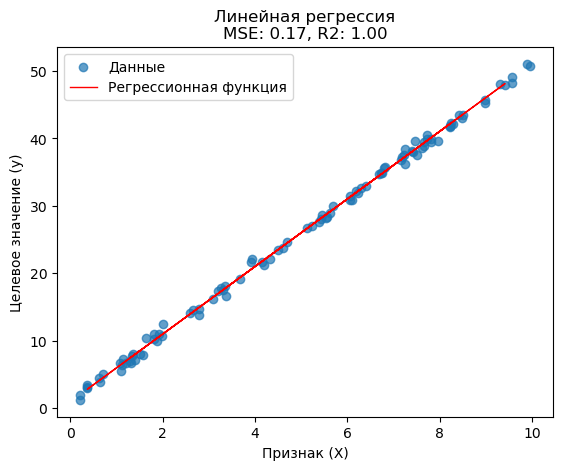

In [6]:
import matplotlib.pyplot as plt


# Нарисовать графики данных и итоговой функции регрессии
plt.scatter(X, y, label='Данные', alpha=0.7)
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Регрессионная функция')
plt.xlabel('Признак (X)')
plt.ylabel('Целевое значение (y)')
plt.legend()
plt.title(f'Линейная регрессия\nMSE: {mse:.2f}, R2: {r2:.2f}')
plt.show()